## Libraries Required.

In [3]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from scipy.stats import skewnorm,skew

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix,roc_curve, multilabel_confusion_matrix
from sklearn.metrics import precision_score,recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data Set

In [4]:
df = pd.read_csv(r"D:\VELOCITY\m.csv")
df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(6), object(4)
memory usage: 281.5+ KB


## Metabolic Syndrome 

In [240]:
# Its the target column. 
# we have to predict whether the person has metabolic syndrome or not.
# we are converting objective data into numerical using label encoding. 
# MetSyn = 1 and No MetSyn = 0.

In [4]:

df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


In [5]:
df['MetabolicSyndrome'].value_counts()

0    1579
1     822
Name: MetabolicSyndrome, dtype: int64

In [6]:
df.corr()['MetabolicSyndrome']

seqn                 0.011364
Age                  0.248618
Income              -0.083706
WaistCirc            0.497479
BMI                  0.430825
Albuminuria          0.158501
UrAlbCr              0.085168
UricAcid             0.246423
BloodGlucose         0.362219
HDL                 -0.371378
Triglycerides        0.427241
MetabolicSyndrome    1.000000
Name: MetabolicSyndrome, dtype: float64

## Label Encoding..

### i. Sex

In [7]:
df['Sex'].value_counts().to_dict()

{'Female': 1211, 'Male': 1190}

In [8]:
df['Sex'].replace({'Female': 0, 'Male': 1},inplace = True)
df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,1,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,0,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,1,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,0,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,1,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


### ii. Marital 

In [9]:
df['Marital'].value_counts().to_dict()

{'Married': 1192,
 'Single': 498,
 'Divorced': 242,
 'Widowed': 166,
 'Separated': 95}

In [8]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,2391,2392,2393,2394,2395,2396,2397,2398,2399,2400
seqn,62161,62164,62169,62172,62177,62178,62184,62189,62191,62195,...,71886,71887,71891,71895,71898,71901,71904,71909,71911,71915
Age,22,44,21,43,51,80,26,30,70,35,...,61,68,54,31,65,48,30,28,27,60
Sex,Male,Female,Male,Female,Male,Male,Male,Female,Male,Male,...,Male,Female,Female,Male,Female,Female,Female,Male,Male,Male
Marital,Single,Married,Single,Single,Married,Widowed,Single,Married,Divorced,NaN,...,Single,Married,Married,Married,Married,Married,Single,Single,Married,Single
Income,8200.0,4500.0,800.0,2000.0,NaN,300.0,9000.0,6200.0,1000.0,2500.0,...,2500.0,1600.0,5400.0,2500.0,5400.0,1000.0,2000.0,800.0,8200.0,6200.0
Race,White,White,Asian,Black,Asian,White,Black,Asian,Black,Black,...,Black,Hispanic,MexAmerican,Asian,MexAmerican,Other,Asian,MexAmerican,MexAmerican,White
WaistCirc,81.0,80.1,69.6,120.4,81.1,112.5,78.6,80.2,NaN,99.0,...,98.2,95.8,96.0,74.0,98.5,NaN,NaN,100.8,106.6,106.6
BMI,23.3,23.2,20.1,33.3,20.1,28.5,22.1,22.4,NaN,28.2,...,26.8,28.9,28.4,20.6,29.4,59.7,18.0,29.4,31.3,27.5
Albuminuria,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
UrAlbCr,3.88,8.55,5.07,5.22,8.13,9.79,9.21,8.78,45.67,2.21,...,2.91,5.15,5.39,2.0,5.51,22.11,2.9,2.78,4.15,12.82


In [10]:
df[["Marital",'MetabolicSyndrome']]

,Marital,MetabolicSyndrome
0,Single,No MetSyn
1,Married,No MetSyn
2,Single,No MetSyn
3,Single,No MetSyn
4,Married,No MetSyn
...,...,...
2396,Married,No MetSyn
2397,Single,No MetSyn
2398,Single,No MetSyn
2399,Married,MetSyn


In [10]:
df['Marital'].replace({'Married': 0,
 'Single': 1,
 'Divorced': 2,
 'Widowed': 3,
 'Separated': 4},inplace = True)
df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,1,1.0,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,0,0.0,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,1,1.0,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,0,1.0,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,1,0.0,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


### iii. Race

In [11]:
df['Race'].value_counts().to_dict()

{'White': 933,
 'Black': 548,
 'Asian': 349,
 'Hispanic': 257,
 'MexAmerican': 253,
 'Other': 61}

In [12]:
df['Race'].replace({'White': 1,
 'Black': 2,
 'Asian': 3,
 'Hispanic': 4,
 'MexAmerican': 5,
 'Other': 6},inplace = True)
df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,1,1.0,8200.0,1,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,0,0.0,4500.0,1,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,1,1.0,800.0,3,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,0,1.0,2000.0,2,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,1,0.0,NaN,3,81.1,20.1,0,8.13,5.0,95,43,126,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   int64  
 3   Marital            2193 non-null   float64
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   int64  
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(6), int64(9)
memory usage: 281.5 KB


## Checking for Null Values..

In [14]:
df.isna().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

## Handling Null values..

### i. Waist Circle

In [15]:
df['WaistCirc'].isna().sum()

85

In [16]:
df['WaistCirc'].value_counts()

97.0     23
100.0    17
103.0    14
99.0     13
89.0     12
         ..
81.7      1
135.8     1
124.7     1
63.1      1
69.5      1
Name: WaistCirc, Length: 635, dtype: int64

In [17]:
df['WaistCirc'].describe()

count    2316.000000
mean       98.307254
std        16.252634
min        56.200000
25%        86.675000
50%        97.000000
75%       107.625000
max       176.000000
Name: WaistCirc, dtype: float64

In [255]:
# using Median because median value is around 97 cm and the normal proportion of most people having 
# waist circle is around 94cm to 102cm

In [18]:
df['WaistCirc'] = df['WaistCirc'].fillna(df['WaistCirc'].median())
df['WaistCirc'].isna().sum()

0

### ii. BMI

In [19]:
df['BMI'].isna().sum()

26

In [20]:
df['BMI'].describe()

count    2375.000000
mean       28.702189
std         6.662242
min        13.400000
25%        24.000000
50%        27.700000
75%        32.100000
max        68.700000
Name: BMI, dtype: float64

In [259]:
# Range for BMI
# underweight = below 18.5
# healthy = between 18.5 and 24.9
# overweight = between 25 and 29.9
# obese = more than 30.

<AxesSubplot:>

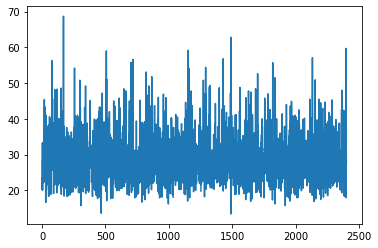

In [21]:
df['BMI'].plot()

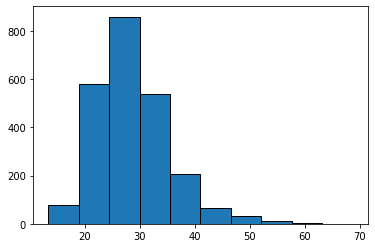

In [22]:
plt.hist(df['BMI'],edgecolor='black',bins=10)
plt.show()

In [262]:
# we are using median as fill value because the number of people having BMI in this range are higher.

In [23]:
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['BMI'].isna().sum()

0

### iii. Marital

In [24]:
df['Marital'].isna().sum()

208

In [25]:
# {'Married': 1192,
#  'Single': 498,
#  'Divorced': 242,
#  'Widowed': 166,
#  'Separated': 95}

df['Marital'].value_counts()

0.0    1192
1.0     498
2.0     242
3.0     166
4.0      95
Name: Marital, dtype: int64

<AxesSubplot:ylabel='Marital'>

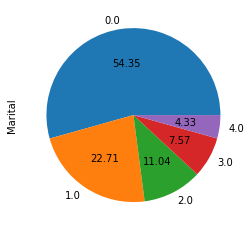

In [26]:
df['Marital'].value_counts().plot(kind='pie',autopct='%.2f')

In [267]:
# we are using mode here because this column has categorical value.
# and we are taking most common value to fill the null values.

<AxesSubplot:xlabel='Marital', ylabel='count'>

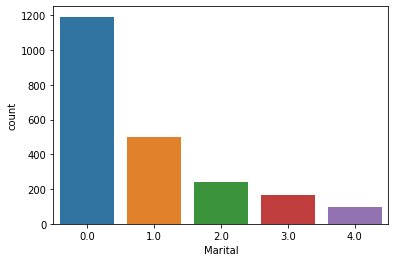

In [27]:
sns.countplot(x ='Marital', data = df)

In [28]:
df['Marital'] = df['Marital'].fillna(df['Marital'].mode()[0])
df['Marital'].isna().sum()

0

<AxesSubplot:xlabel='Marital', ylabel='count'>

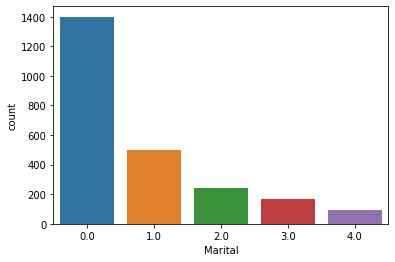

In [29]:
sns.countplot(x ='Marital', data = df)

### iv. Income

In [30]:
df['Income'].describe()

count    2284.000000
mean     4005.253940
std      2954.032186
min       300.000000
25%      1600.000000
50%      2500.000000
75%      6200.000000
max      9000.000000
Name: Income, dtype: float64

In [31]:
pd.crosstab([df['Income'],df['BMI']], df['MetabolicSyndrome'], normalize = 'index')

MetabolicSyndrome    0    1
Income BMI                 
300.0  17.0        1.0  0.0
       17.1        1.0  0.0
       17.6        1.0  0.0
       17.7        1.0  0.0
       17.8        1.0  0.0
...                ...  ...
9000.0 19.0        1.0  0.0
       42.5        0.0  1.0
       48.2        0.0  1.0
       59.0        0.0  1.0
       68.7        0.0  1.0

[1526 rows x 2 columns]

In [32]:
df['Income'].value_counts()

9000.0    337
2500.0    257
3500.0    228
1000.0    210
2000.0    207
1600.0    190
8200.0    178
6200.0    138
4500.0    136
800.0     123
5400.0    103
300.0      93
1700.0     54
1500.0     30
Name: Income, dtype: int64

In [33]:
df.corr(method = 'kendall')['MetabolicSyndrome']

seqn                 0.009265
Age                  0.208364
Sex                  0.020355
Marital             -0.003188
Income              -0.065071
Race                -0.008372
WaistCirc            0.414156
BMI                  0.373531
Albuminuria          0.157026
UrAlbCr              0.155540
UricAcid             0.193908
BloodGlucose         0.432501
HDL                 -0.340988
Triglycerides        0.394229
MetabolicSyndrome    1.000000
Name: MetabolicSyndrome, dtype: float64

In [34]:
df['Income'].isna().sum()

117

In [35]:
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Income'].isna().sum()

0

## Handlling Outliers..

### i. Waist Circle

<AxesSubplot:xlabel='WaistCirc'>

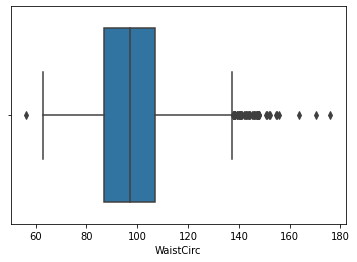

In [36]:
sns.boxplot(x = df['WaistCirc'])

<AxesSubplot:xlabel='WaistCirc', ylabel='Density'>

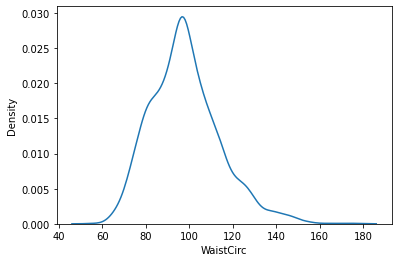

In [37]:
sns.kdeplot(df['WaistCirc'])

In [38]:
skew(df['WaistCirc'])                  # skewnewss -0.5 to 0.5

0.6542140064169628

In [39]:
q1 = df['WaistCirc'].quantile(0.25)
q2 = df['WaistCirc'].quantile(0.50)
q3 = df['WaistCirc'].quantile(0.75)
mean = df['WaistCirc'].mean()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("mean :",mean)

iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr
print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 87.0
Q2 : 97.0
Q3 : 107.2
mean : 98.26097459391929
Upper Tail : 167.8
Lower Tail : 26.39999999999999


In [281]:
#df[['WaistCirc']].loc[df['WaistCirc'] > upper_tail]

In [40]:
df['WaistCirc'].describe()

count    2401.000000
mean       98.260975
std        15.964061
min        56.200000
25%        87.000000
50%        97.000000
75%       107.200000
max       176.000000
Name: WaistCirc, dtype: float64

In [283]:
# for i in df['WaistCirc']:
#     q1 = df['WaistCirc'].quantile(0.25)
#     q3 = df['WaistCirc'].quantile(0.75)
#     IQR = q3 - q1
#     upper_tail = q3 + 1.5*IQR
#     lower_tail = q1 - 1.5*IQR
#     if (i > upper_tail):
#         df['WaistCirc'] = df['WaistCirc'].replace(i,upper_tail)
        
#     elif (i < lower_tail):
#         df['WaistCirc'] = df['WaistCirc'].replace(i,lower_tail)

<AxesSubplot:xlabel='WaistCirc'>

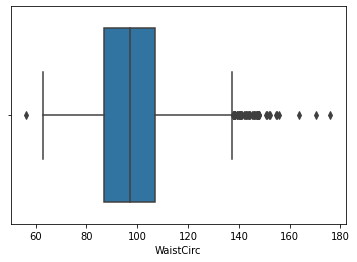

In [41]:
sns.boxplot(df['WaistCirc'])

### ii. BMI 

In [42]:
df['BMI'].describe()

count    2401.000000
mean       28.691337
std         6.626869
min        13.400000
25%        24.000000
50%        27.700000
75%        32.000000
max        68.700000
Name: BMI, dtype: float64

<AxesSubplot:xlabel='BMI'>

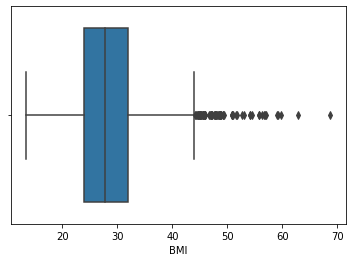

In [43]:
sns.boxplot(df['BMI'])

<AxesSubplot:xlabel='BMI', ylabel='Density'>

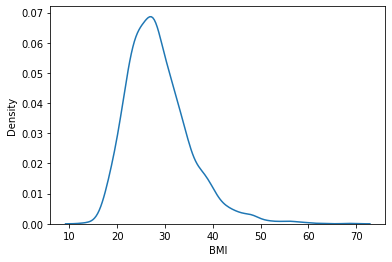

In [44]:
sns.kdeplot(df['BMI'])

In [45]:
q1 = df["BMI"].quantile(0.25)
q2 = df["BMI"].quantile(0.50)
q3 = df["BMI"].quantile(0.75)
mean = df["BMI"].mean()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("mean :",mean)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr
print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 24.0
Q2 : 27.7
Q3 : 32.0
mean : 28.691336942940428
Upper Tail : 44.0
Lower Tail : 12.0


In [289]:
# for i in df["BMI"]:
#     q1 = df["BMI"].quantile(0.25)
#     q3 = df["BMI"].quantile(0.75)
#     IQR = q3 - q1
#     upper_tail = q3 + 1.5*IQR
#     lower_tail = q1 - 1.5*IQR
#     if (i < lower_tail) or (i > upper_tail):
#         df["BMI"] = df["BMI"].replace(i,np.median(df["BMI"]))

<AxesSubplot:xlabel='BMI'>

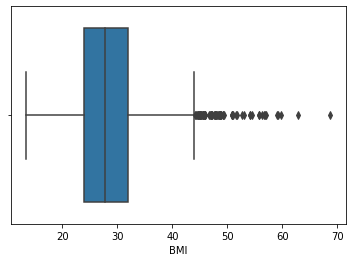

In [46]:
sns.boxplot(df['BMI'])

<AxesSubplot:xlabel='BMI', ylabel='Density'>

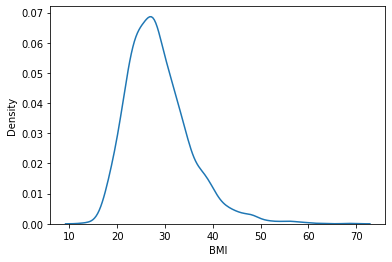

In [47]:
sns.kdeplot(df['BMI'])

In [48]:
skew(df['BMI'])

1.1322193859471514

In [49]:
df.corr()['MetabolicSyndrome']

seqn                 0.011364
Age                  0.248618
Sex                  0.020355
Marital              0.022793
Income              -0.078950
Race                 0.004521
WaistCirc            0.491376
BMI                  0.429441
Albuminuria          0.158501
UrAlbCr              0.085168
UricAcid             0.246423
BloodGlucose         0.362219
HDL                 -0.371378
Triglycerides        0.427241
MetabolicSyndrome    1.000000
Name: MetabolicSyndrome, dtype: float64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   int64  
 3   Marital            2401 non-null   float64
 4   Income             2401 non-null   float64
 5   Race               2401 non-null   int64  
 6   WaistCirc          2401 non-null   float64
 7   BMI                2401 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(6), int64(9)
memory usage: 281.5 KB


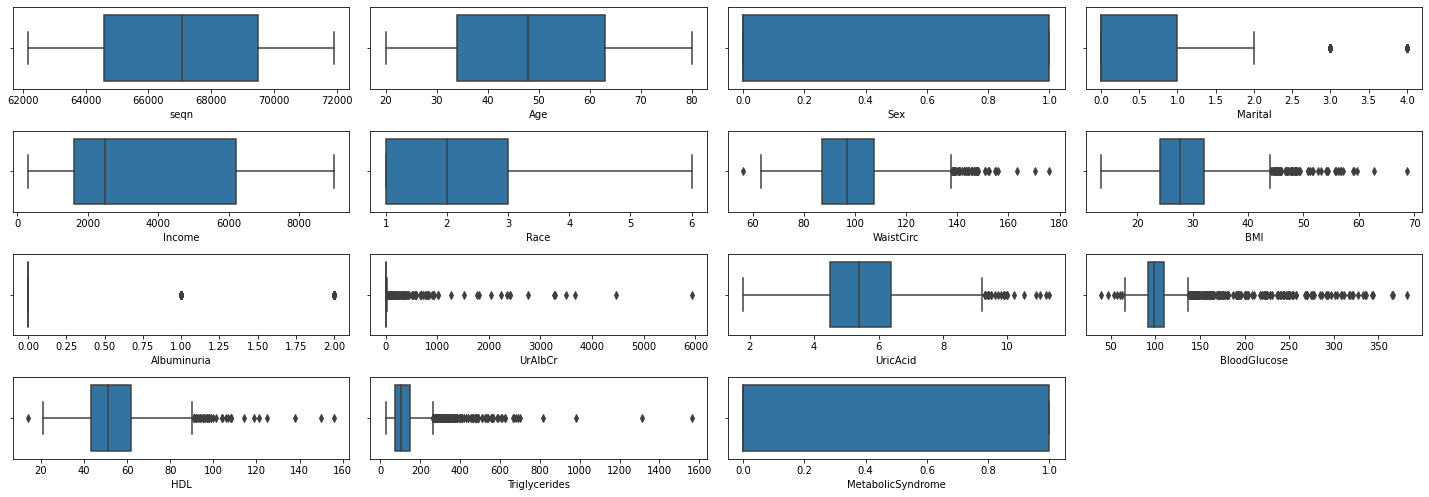

In [51]:
plt.figure(figsize = (20, 10))
x = 1 

for column in df.describe().columns:
    plt.subplot(6,4,x)
    sns.boxplot(df[column])
    x+=1
    
plt.tight_layout()

###  Albuminuria 

In [296]:
# Albuminuria has 3 categories: A1, A2 & A3.

|Category||ACR (mg/g)||Terms|
|------||--------||--------|
|A1||<30||Normal to mildly increased|
|A2||30-300||Moderately increased*|
|A3||>300||Severely increased**|


In [52]:
df['Albuminuria'].value_counts()

0    2089
1     254
2      58
Name: Albuminuria, dtype: int64

In [53]:
df['UrAlbCr'].value_counts()

5.00     18
10.00    12
6.67     10
5.38     10
5.56      9
         ..
15.92     1
15.04     1
14.64     1
19.22     1
12.82     1
Name: UrAlbCr, Length: 1383, dtype: int64

In [54]:
df['UricAcid'].value_counts()

5.2     77
5.8     75
4.6     71
5.4     69
5.0     69
        ..
1.9      1
9.6      1
11.3     1
9.7      1
2.2      1
Name: UricAcid, Length: 88, dtype: int64

In [55]:
df['MetabolicSyndrome'].value_counts() # 0 = negative, 1 = positive

0    1579
1     822
Name: MetabolicSyndrome, dtype: int64

<AxesSubplot:ylabel='MetabolicSyndrome'>

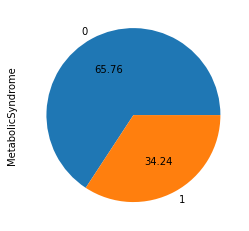

In [56]:
df['MetabolicSyndrome'].value_counts().plot(kind='pie',autopct='%.2f')

In [57]:
df_descr = []
j = 0
for name in df.columns:
      df_descr.append(
      [
       name,
       df[name].dtypes,
       df[name].isnull().sum(),
       round(df[name].isnull().sum()/len(df)*100, 2),
       df[name].nunique(),
       df[name].unique(),
       ]
       )
j += 1

df_columns_desc = pd.DataFrame(df_descr, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
df_columns_desc

,Column,Dtype,Null,Null (%),nUnique,Unique
0,seqn,int64,0,0.0,2401,"[62161, 62164, 62169, 62172, 62177, 62178, 621..."
1,Age,int64,0,0.0,61,"[22, 44, 21, 43, 51, 80, 26, 30, 70, 35, 57, 3..."
2,Sex,int64,0,0.0,2,"[1, 0]"
3,Marital,float64,0,0.0,5,"[1.0, 0.0, 3.0, 2.0, 4.0]"
4,Income,float64,0,0.0,14,"[8200.0, 4500.0, 800.0, 2000.0, 2500.0, 300.0,..."
5,Race,int64,0,0.0,6,"[1, 3, 2, 5, 4, 6]"
6,WaistCirc,float64,0,0.0,635,"[81.0, 80.1, 69.6, 120.4, 81.1, 112.5, 78.6, 8..."
7,BMI,float64,0,0.0,322,"[23.3, 23.2, 20.1, 33.3, 28.5, 22.1, 22.4, 27...."
8,Albuminuria,int64,0,0.0,3,"[0, 1, 2]"
9,UrAlbCr,float64,0,0.0,1383,"[3.88, 8.55, 5.07, 5.22, 8.13, 9.79, 9.21, 8.7..."


In [58]:
df =df.drop(columns = ['seqn'])
df

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,1,1.0,8200.0,1,81.0,23.3,0,3.88,4.9,92,41,84,0
1,44,0,0.0,4500.0,1,80.1,23.2,0,8.55,4.5,82,28,56,0
2,21,1,1.0,800.0,3,69.6,20.1,0,5.07,5.4,107,43,78,0
3,43,0,1.0,2000.0,2,120.4,33.3,0,5.22,5.0,104,73,141,0
4,51,1,0.0,2500.0,3,81.1,20.1,0,8.13,5.0,95,43,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,48,0,0.0,1000.0,6,97.0,59.7,0,22.11,5.8,152,57,107,0
2397,30,0,1.0,2000.0,3,97.0,18.0,0,2.90,7.9,91,90,91,0
2398,28,1,1.0,800.0,5,100.8,29.4,0,2.78,6.2,99,47,84,0
2399,27,1,0.0,8200.0,5,106.6,31.3,0,4.15,6.2,100,41,124,1


# SMOTE - Sampling

In [59]:
df['MetabolicSyndrome'].value_counts()

0    1579
1     822
Name: MetabolicSyndrome, dtype: int64

In [60]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [61]:
x = df.drop("MetabolicSyndrome",axis = 1)
y = df['MetabolicSyndrome']

#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.35, random_state=22, stratify=y)

In [62]:
smt = SMOTE(sampling_strategy=0.90,random_state=None,k_neighbors=5)
x_sampled, y_sampled = smt.fit_resample(x,y)
y_sampled.value_counts()
#y.value_counts()

0    1579
1    1421
Name: MetabolicSyndrome, dtype: int64

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x_sampled,y_sampled,test_size=0.20, random_state=22,stratify=y_sampled)

In [65]:
x_train.shape

(2400, 13)

In [67]:
x_test.shape

(600, 13)

# Features Selection Tech

### Kendall's Corr

In [69]:
corr = df.corr(method='kendall')["MetabolicSyndrome"]
# plt.figure(figsize=(20,2))
# sns.heatmap(corr, annot= True)

In [71]:
corr.sort_values()

HDL                 -0.340988
Income              -0.062592
Race                -0.008372
Marital             -0.003188
Sex                  0.020355
UrAlbCr              0.155540
Albuminuria          0.157026
UricAcid             0.193908
Age                  0.208364
BMI                  0.373531
Triglycerides        0.394229
WaistCirc            0.414156
BloodGlucose         0.432501
MetabolicSyndrome    1.000000
Name: MetabolicSyndrome, dtype: float64

## ANOVA Test

In [72]:
from sklearn.feature_selection import f_classif

f_val, p_val = f_classif(x_sampled,y_sampled)

df4 = pd.DataFrame({'f_val':f_val,'p_val':np.around(p_val,5)},index=x_sampled.columns)
df4.sort_values('f_val')

,f_val,p_val
Marital,1.152905,0.28303
Race,5.084880,0.02421
Sex,15.261213,0.00010
UrAlbCr,16.405369,0.00005
Income,24.338555,0.00000
Albuminuria,35.446497,0.00000
UricAcid,215.380345,0.00000
Age,223.860073,0.00000
BloodGlucose,412.920796,0.00000
HDL,611.965870,0.00000


In [74]:
df=df.drop(['Marital','Race'],axis=1)
df

,Age,Sex,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,1,8200.0,81.0,23.3,0,3.88,4.9,92,41,84,0
1,44,0,4500.0,80.1,23.2,0,8.55,4.5,82,28,56,0
2,21,1,800.0,69.6,20.1,0,5.07,5.4,107,43,78,0
3,43,0,2000.0,120.4,33.3,0,5.22,5.0,104,73,141,0
4,51,1,2500.0,81.1,20.1,0,8.13,5.0,95,43,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2396,48,0,1000.0,97.0,59.7,0,22.11,5.8,152,57,107,0
2397,30,0,2000.0,97.0,18.0,0,2.90,7.9,91,90,91,0
2398,28,1,800.0,100.8,29.4,0,2.78,6.2,99,47,84,0
2399,27,1,8200.0,106.6,31.3,0,4.15,6.2,100,41,124,1


In [75]:
# train test split

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x_sampled,y_sampled,test_size=0.20, random_state=22,stratify=y_sampled)

## Model Training

In [77]:
Log_mod =LogisticRegression()
Log_mod.fit(x_train,y_train)

LogisticRegression()

In [78]:
# Testing Data Evaluation
y_pred = Log_mod.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*88)

Log_acc_test = accuracy_score(y_test, y_pred)
print("Accuracy :",Log_acc_test)
print("*"*88)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

print("*"*88)
log_precision_test = precision_score(y_test, y_pred)
print("Precision :",log_precision_test)

log_recall_test = recall_score(y_test, y_pred)
print("Recall :",log_recall_test)

log_f1_score_test = f1_score(y_test, y_pred)
print("f1-score :",log_f1_score_test)

Confusion Matrix :
 [[244  72]
 [ 52 232]]
****************************************************************************************
Accuracy : 0.7933333333333333
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.77      0.80       316
           1       0.76      0.82      0.79       284

    accuracy                           0.79       600
   macro avg       0.79      0.79      0.79       600
weighted avg       0.80      0.79      0.79       600

****************************************************************************************
Precision : 0.7631578947368421
Recall : 0.8169014084507042
f1-score : 0.7891156462585034


In [79]:
# Training Data Evaluation
y_pred_train = Log_mod.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)

Log_acc_train = accuracy_score(y_train, y_pred_train)
print("Accuracy :",Log_acc_train)
print("*"*88)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

print("*"*88)
log_precision_train = precision_score(y_train, y_pred_train)
print("Precision :",log_precision_train)

log_recall_train = recall_score(y_train, y_pred_train)
print("Recall :",log_recall_train)

log_f1_score_train = f1_score(y_train, y_pred_train)
print("f1-score :",log_f1_score_train)

Confusion Matrix :
 [[1022  241]
 [ 225  912]]
****************************************************************************************
Accuracy : 0.8058333333333333
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1263
           1       0.79      0.80      0.80      1137

    accuracy                           0.81      2400
   macro avg       0.81      0.81      0.81      2400
weighted avg       0.81      0.81      0.81      2400

****************************************************************************************
Precision : 0.7909800520381614
Recall : 0.8021108179419525
f1-score : 0.7965065502183406


## KNN

In [80]:
std_scaler = StandardScaler()
array = std_scaler.fit_transform(x_sampled)
x_std_df = pd.DataFrame(array,columns=x_sampled.columns)
x_std_df.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
0,-1.634069,1.095177,0.204130,1.512302,-0.929236,-1.220995,-0.933233,-0.35732,-0.161928,-0.482122,-0.531208,-0.727491,-0.547370
1,-0.340021,-0.913094,-0.709351,0.225300,-0.929236,-1.277727,-0.948451,-0.35732,-0.143946,-0.766074,-0.812543,-1.611744,-0.830445
2,-1.692889,1.095177,0.204130,-1.061701,0.470216,-1.939601,-1.420205,-0.35732,-0.157346,-0.127181,-0.109205,-0.591452,-0.608029
3,-0.398841,-0.913094,0.204130,-0.644295,-0.229510,1.262608,0.588555,-0.35732,-0.156768,-0.411134,-0.193605,1.449132,0.028891
4,0.071722,1.095177,-0.709351,-0.470376,0.470216,-1.214691,-1.420205,-0.35732,-0.145564,-0.411134,-0.446807,-0.591452,-0.122757


In [81]:
x = x_std_df.copy()
y = df['MetabolicSyndrome']
x_train, x_test, y_train, y_test = train_test_split(x_sampled,y_sampled,test_size=0.20, random_state=22, stratify=y_sampled)

## Model Training

In [82]:
knn_clf = KNeighborsClassifier() # Euclidean Distance, k = 5
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

In [83]:
# Training Data Evaluation
y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

knn_acc_train = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",knn_acc_train)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

print("*"*88)
knn_precision_train = precision_score(y_train, y_pred_train)
print("Precision :",knn_precision_train)

knn_recall_train = recall_score(y_train, y_pred_train)
print("Recall :",knn_recall_train)

knn_f1_score_train = f1_score(y_train, y_pred_train)
print("f1-score :",knn_f1_score_train)

Confusion Matrix :
 [[1070  193]
 [  90 1047]]
********************************************************************************
Accuracy is : 0.8820833333333333
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.85      0.88      1263
           1       0.84      0.92      0.88      1137

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.89      0.88      0.88      2400

****************************************************************************************
Precision : 0.8443548387096774
Recall : 0.920844327176781
f1-score : 0.8809423643247791


In [84]:
# Testing Data Evaluation
y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

knn_acc_test = accuracy_score(y_test, y_pred)
print("Accuracy :",knn_acc_test)
print("*"*88)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

print("*"*88)
knn_precision_test = precision_score(y_test, y_pred)
print("Precision :",knn_precision_test)

knn_recall_test = recall_score(y_test, y_pred)
print("Recall :",knn_recall_test)

knn_f1_score_test = f1_score(y_test, y_pred)
print("f1-score :",knn_f1_score_test)

Confusion Matrix :
 [[257  59]
 [ 24 260]]
********************************************************************************
Accuracy : 0.8616666666666667
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.81      0.86       316
           1       0.82      0.92      0.86       284

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.87      0.86      0.86       600

****************************************************************************************
Precision : 0.8150470219435737
Recall : 0.9154929577464789
f1-score : 0.8623548922056385


In [85]:
knn_clf = KNeighborsClassifier() 

hyperparameters = {"n_neighbors" : np.arange(3,30),
                  'p' :[1,2]}

gscv_knn_clf = RandomizedSearchCV(knn_clf,hyperparameters,cv=5)
gscv_knn_clf.fit(x_train, y_train)
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=7, p=1)

In [86]:
# Testing Data Evaluation
knn_clf_hp = gscv_knn_clf.best_estimator_

y_pred = knn_clf_hp.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

knn_acc_test_hp = accuracy_score(y_test, y_pred)
print("Accuracy :",knn_acc_test_hp)
print("*"*88)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

print("*"*88)
knn_precision_test_hp = precision_score(y_test, y_pred)
print("Precision :",knn_precision_test_hp)

knn_recall_test_hp = recall_score(y_test, y_pred)
print("Recall :",knn_recall_test_hp)

knn_f1_score_test_hp = f1_score(y_test, y_pred)
print("f1-score :",knn_f1_score_test_hp)

Confusion Matrix :
 [[261  55]
 [ 30 254]]
********************************************************************************
Accuracy : 0.8583333333333333
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       316
           1       0.82      0.89      0.86       284

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600

****************************************************************************************
Precision : 0.8220064724919094
Recall : 0.8943661971830986
f1-score : 0.8566610455311973


In [87]:
# Training Data Evaluation
y_pred_train = knn_clf_hp.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

knn_acc_train_hp = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",knn_acc_train_hp)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

print("*"*88)
knn_precision_train_hp = precision_score(y_train, y_pred_train)
print("Precision :",knn_precision_train_hp)

knn_recall_train_hp = recall_score(y_train, y_pred_train)
print("Recall :",knn_recall_train_hp)

knn_f1_score_train_hp = f1_score(y_train, y_pred_train)
print("f1-score :",knn_f1_score_train_hp)

Confusion Matrix :
 [[1075  188]
 [  91 1046]]
********************************************************************************
Accuracy is : 0.88375
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.85      0.89      1263
           1       0.85      0.92      0.88      1137

    accuracy                           0.88      2400
   macro avg       0.88      0.89      0.88      2400
weighted avg       0.89      0.88      0.88      2400

****************************************************************************************
Precision : 0.8476499189627229
Recall : 0.9199648197009674
f1-score : 0.8823281315900465


# Descision Tree Classifier

In [88]:
x = df.drop("MetabolicSyndrome",axis = 1)
y = df['MetabolicSyndrome']

x_train, x_test, y_train, y_test = train_test_split(x_sampled,y_sampled,test_size=0.20, random_state=22,stratify=y_sampled)

In [89]:
dt_clf =DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [90]:
# Training Data Evaluation
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*88)

dt_acc_train = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",dt_acc_train)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

print("*"*88)
dt_precision_train = precision_score(y_train, y_pred_train)
print("Precision :",dt_precision_train)

dt_recall_train = recall_score(y_train, y_pred_train)
print("Recall :",dt_recall_train)

dt_f1_score_train = f1_score(y_train, y_pred_train)
print("f1-score :",dt_f1_score_train)

Confusion Matrix :
 [[1263    0]
 [   0 1137]]
****************************************************************************************
Accuracy is : 1.0
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1137

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400

****************************************************************************************
Precision : 1.0
Recall : 1.0
f1-score : 1.0


In [91]:
# Testing Data Evaluation
y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*88)

dt_acc_test = accuracy_score(y_test, y_pred)
print("Accuracy :",dt_acc_test)
print("*"*88)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

print("*"*88)
dt_precision_test = precision_score(y_test, y_pred)
print("Precision :",dt_precision_test)

dt_recall_test = recall_score(y_test, y_pred)
print("Recall :",dt_recall_test)

dt_f1_score_test = f1_score(y_test, y_pred)
print("f1-score :",dt_f1_score_test)

Confusion Matrix :
 [[278  38]
 [ 33 251]]
****************************************************************************************
Accuracy : 0.8816666666666667
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       316
           1       0.87      0.88      0.88       284

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600

****************************************************************************************
Precision : 0.8685121107266436
Recall : 0.8838028169014085
f1-score : 0.8760907504363001


In [92]:
hyperparameters ={ "criterion" :['gini','entropy'],
     'max_depth': np.arange(3,8),
     'min_samples_split' : np.arange(2,20),
     'min_samples_leaf':np.arange(2,15)}

rndcv_dt_clf = RandomizedSearchCV(dt_clf,hyperparameters, cv = 5)
rndcv_dt_clf.fit(x_train, y_train)
rndcv_dt_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=6,
                       min_samples_split=11)

In [93]:
# Testing Data Evaluation
dt_clf_hp = rndcv_dt_clf.best_estimator_

y_pred = dt_clf_hp.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

dt_acc_test_hp = accuracy_score(y_test, y_pred)
print("Accuracy :",dt_acc_test_hp)
print("*"*88)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

print("*"*88)
dt_precision_test_hp = precision_score(y_test, y_pred)
print("Precision :",dt_precision_test_hp)

dt_recall_test_hp = recall_score(y_test, y_pred)
print("Recall :",dt_recall_test_hp)

dt_f1_score_test_hp = f1_score(y_test, y_pred)
print("f1-score :",dt_f1_score_test_hp)

Confusion Matrix :
 [[266  50]
 [ 22 262]]
********************************************************************************
Accuracy : 0.88
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       316
           1       0.84      0.92      0.88       284

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600

****************************************************************************************
Precision : 0.8397435897435898
Recall : 0.9225352112676056
f1-score : 0.8791946308724832


In [94]:
# Training Data Evaluation
y_pred_train = dt_clf_hp.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

dt_acc_train_hp = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",dt_acc_train_hp)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

print("*"*88)
dt_precision_train_hp = precision_score(y_train, y_pred_train)
print("Precision :",dt_precision_train_hp)

dt_recall_train_hp = recall_score(y_train, y_pred_train)
print("Recall :",dt_recall_train_hp)

dt_f1_score_train_hp = f1_score(y_train, y_pred_train)
print("f1-score :",dt_f1_score_train_hp)

Confusion Matrix :
 [[1091  172]
 [  61 1076]]
********************************************************************************
Accuracy is : 0.9029166666666667
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      1263
           1       0.86      0.95      0.90      1137

    accuracy                           0.90      2400
   macro avg       0.90      0.91      0.90      2400
weighted avg       0.91      0.90      0.90      2400

****************************************************************************************
Precision : 0.8621794871794872
Recall : 0.9463500439753738
f1-score : 0.9023060796645703


## Pruning

In [156]:
result = dt_clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha_list = result['ccp_alphas']
# ccp_alpha_list

In [157]:
train_accuracy_list = []
test_accuracy_list = []
for ccp_alpha in ccp_alpha_list:
    dt_clf = DecisionTreeClassifier(random_state=22,ccp_alpha=ccp_alpha)
    dt_clf.fit(x_train, y_train)
    train_accuracy_list.append(dt_clf.score(x_train, y_train))
    test_accuracy_list.append(dt_clf.score(x_test, y_test))
    
# train_accuracy_list
# test_accuracy_list

In [158]:
np.where(test_accuracy_list == np.max(test_accuracy_list))

(array([33, 34, 35, 36, 52, 53, 54, 55, 56, 57, 58, 59, 60, 79, 81, 89, 90],
       dtype=int64),)

In [159]:
ccp_alpha_list[33]

0.000634920634920635

In [160]:
train_accuracy_list[33]

0.98

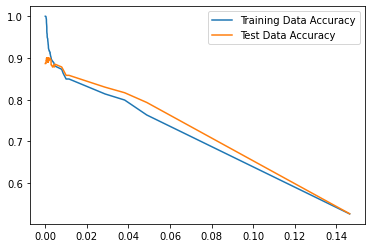

In [161]:
fig,ax = plt.subplots()
ax.plot(ccp_alpha_list, train_accuracy_list, label = "Training Data Accuracy")
ax.plot(ccp_alpha_list, test_accuracy_list, label = "Test Data Accuracy")
ax.legend()

In [162]:
dt_clf = DecisionTreeClassifier(random_state=22,ccp_alpha=ccp_alpha_list[33])
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.000634920634920635, random_state=22)

In [163]:
# Training Data Evaluation
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*88)

dt_acc_train_pr = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",dt_acc_train_pr)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

print("*"*88)
dt_precision_train_pr = precision_score(y_train, y_pred_train)
print("Precision :",dt_precision_train_pr)

dt_recall_train_pr = recall_score(y_train, y_pred_train)
print("Recall :",dt_recall_train_pr)

dt_f1_score_train_pr = f1_score(y_train, y_pred_train)
print("f1-score :",dt_f1_score_train_pr)

Confusion Matrix :
 [[1239   24]
 [  24 1113]]
****************************************************************************************
Accuracy is : 0.98
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1263
           1       0.98      0.98      0.98      1137

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400

****************************************************************************************
Precision : 0.978891820580475
Recall : 0.978891820580475
f1-score : 0.978891820580475


In [164]:
# Testing Data Evaluation
y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*88)

dt_acc_test_pr = accuracy_score(y_test, y_pred)
print("Accuracy :",dt_acc_test_pr)
print("*"*88)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

print("*"*88)
dt_precision_test_pr = precision_score(y_test, y_pred)
print("Precision :",dt_precision_test_pr)

dt_recall_test_pr = recall_score(y_test, y_pred)
print("Recall :",dt_recall_test_pr)

dt_f1_score_test_pr = f1_score(y_test, y_pred)
print("f1-score :",dt_f1_score_test_pr)

Confusion Matrix :
 [[284  32]
 [ 28 256]]
****************************************************************************************
Accuracy : 0.9
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       316
           1       0.89      0.90      0.90       284

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600

****************************************************************************************
Precision : 0.8888888888888888
Recall : 0.9014084507042254
f1-score : 0.8951048951048951


# Random Forest

In [117]:
x = df.drop("MetabolicSyndrome",axis = 1)
y = df['MetabolicSyndrome']

x_train, x_test, y_train, y_test = train_test_split(x_sampled,y_sampled,test_size=0.20, random_state=22,stratify=y_sampled)

In [170]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [119]:
# Training Data Evaluation
y_pred_train = rf_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*88)

rf_acc_train = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",rf_acc_train)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

print("*"*88)
rf_precision_train = precision_score(y_train, y_pred_train)
print("Precision :",rf_precision_train)

rf_recall_train = recall_score(y_train, y_pred_train)
print("Recall :",rf_recall_train)

rf_f1_score_train = f1_score(y_train, y_pred_train)
print("f1-score :",rf_f1_score_train)

Confusion Matrix :
 [[1263    0]
 [   0 1137]]
****************************************************************************************
Accuracy is : 1.0
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1137

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400

****************************************************************************************
Precision : 1.0
Recall : 1.0
f1-score : 1.0


In [120]:
# Testing Data Evaluation
y_pred = rf_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*88)

rf_acc_test = accuracy_score(y_test, y_pred)
print("Accuracy :",rf_acc_test)
print("*"*88)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

print("*"*88)
rf_precision_test = precision_score(y_test, y_pred)
print("Precision :",rf_precision_test)

rf_recall_test = recall_score(y_test, y_pred)
print("Recall :",rf_recall_test)

rf_f1_score_test = f1_score(y_test, y_pred)
print("f1-score :",rf_f1_score_test)

Confusion Matrix :
 [[288  28]
 [ 19 265]]
****************************************************************************************
Accuracy : 0.9216666666666666
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       316
           1       0.90      0.93      0.92       284

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600

****************************************************************************************
Precision : 0.9044368600682594
Recall : 0.9330985915492958
f1-score : 0.9185441941074522


## with Hyper Parameters

In [99]:
hyperparameters = {
                "n_estimators" :np.arange(10,200),
                "criterion" : ['gini','entropy'],
                "max_depth" : np.arange(3, 20),
                "min_samples_split" : np.arange(4,20), 
                "min_samples_leaf" : np.arange(3,10),
                "oob_score" : [True],
                "random_state" : [11]
                    }

In [100]:
rndcv_rf_model = RandomizedSearchCV(rf_clf,hyperparameters,cv = 7)
rndcv_rf_model.fit(x_train, y_train)
rndcv_rf_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=9,
                       min_samples_split=16, n_estimators=191, oob_score=True,
                       random_state=11)

In [101]:
# Testing Data Evaluation
rf_clf_hp = rndcv_dt_clf.best_estimator_

y_pred = rf_clf_hp.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

rf_acc_test_hp = accuracy_score(y_test, y_pred)
print("Accuracy :",rf_acc_test_hp)
print("*"*88)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

print("*"*88)
rf_precision_test_hp = precision_score(y_test, y_pred)
print("Precision :",rf_precision_test_hp)

rf_recall_test_hp = recall_score(y_test, y_pred)
print("Recall :",rf_recall_test_hp)

rf_f1_score_test_hp = f1_score(y_test, y_pred)
print("f1-score :",rf_f1_score_test_hp)

Confusion Matrix :
 [[266  50]
 [ 22 262]]
********************************************************************************
Accuracy : 0.88
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       316
           1       0.84      0.92      0.88       284

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600

****************************************************************************************
Precision : 0.8397435897435898
Recall : 0.9225352112676056
f1-score : 0.8791946308724832


In [102]:
# Training Data Evaluation
y_pred_train = rf_clf_hp.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

rf_acc_train_hp = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",rf_acc_train_hp)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

print("*"*88)
rf_precision_train_hp = precision_score(y_train, y_pred_train)
print("Precision :",rf_precision_train_hp)

rf_recall_train_hp = recall_score(y_train, y_pred_train)
print("Recall :",rf_recall_train_hp)

rf_f1_score_train_hp = f1_score(y_train, y_pred_train)
print("f1-score :",rf_f1_score_train_hp)

Confusion Matrix :
 [[1091  172]
 [  61 1076]]
********************************************************************************
Accuracy is : 0.9029166666666667
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      1263
           1       0.86      0.95      0.90      1137

    accuracy                           0.90      2400
   macro avg       0.90      0.91      0.90      2400
weighted avg       0.91      0.90      0.90      2400

****************************************************************************************
Precision : 0.8621794871794872
Recall : 0.9463500439753738
f1-score : 0.9023060796645703


<AxesSubplot:>

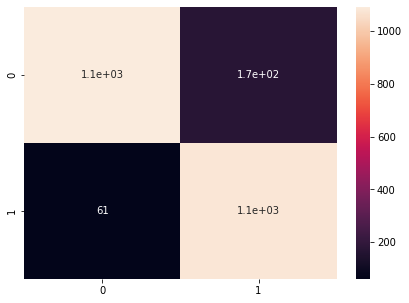

In [103]:
plt.figure(figsize = (7, 5))
sns.heatmap(cnf_matrix, annot = True)

# Adaptiive Boosting - AdaBoost

In [104]:
x = df.drop("MetabolicSyndrome",axis = 1)
y = df['MetabolicSyndrome']

x_train, x_test, y_train, y_test = train_test_split(x_sampled,y_sampled,test_size=0.20, random_state=22,stratify=y_sampled)

In [105]:
adb_clf = AdaBoostClassifier()
adb_clf.fit(x_train, y_train)

AdaBoostClassifier()

In [106]:
# Training Data Evaluation
y_pred_train = adb_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*88)

adb_acc_train = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",adb_acc_train)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

print("*"*88)
adb_precision_train = precision_score(y_train, y_pred_train)
print("Precision :",adb_precision_train)

adb_recall_train = recall_score(y_train, y_pred_train)
print("Recall :",adb_recall_train)

adb_f1_score_train = f1_score(y_train, y_pred_train)
print("f1-score :",adb_f1_score_train)

Confusion Matrix :
 [[1147  116]
 [ 112 1025]]
****************************************************************************************
Accuracy is : 0.905
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      1263
           1       0.90      0.90      0.90      1137

    accuracy                           0.91      2400
   macro avg       0.90      0.90      0.90      2400
weighted avg       0.91      0.91      0.91      2400

****************************************************************************************
Precision : 0.8983347940403155
Recall : 0.9014951627088831
f1-score : 0.8999122036874452


In [107]:
# Testing Data Evaluation
y_pred = adb_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*88)

adb_acc_test = accuracy_score(y_test, y_pred)
print("Accuracy :",adb_acc_test)
print("*"*88)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

print("*"*88)
adb_precision_test = precision_score(y_test, y_pred)
print("Precision :",adb_precision_test)

adb_recall_test = recall_score(y_test, y_pred)
print("Recall :",adb_recall_test)

adb_f1_score_test = f1_score(y_test, y_pred)
print("f1-score :",adb_f1_score_test)

Confusion Matrix :
 [[278  38]
 [ 31 253]]
****************************************************************************************
Accuracy : 0.885
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       316
           1       0.87      0.89      0.88       284

    accuracy                           0.89       600
   macro avg       0.88      0.89      0.88       600
weighted avg       0.89      0.89      0.89       600

****************************************************************************************
Precision : 0.8694158075601375
Recall : 0.8908450704225352
f1-score : 0.88


# Hyperparameter tunnig

In [108]:
adb_clf = AdaBoostClassifier(random_state=23)


Hyperparameters = {"n_estimators" : np.arange(10,100),
                    "learning_rate" : np.arange(0,2,0.001)
                }

rscv_adb_clf = RandomizedSearchCV(adb_clf,Hyperparameters,cv= 3)
rscv_adb_clf.fit(x_train, y_train)
rscv_adb_clf.best_estimator_

AdaBoostClassifier(learning_rate=0.34800000000000003, n_estimators=72,
                   random_state=23)

In [109]:
# Testing Data Evaluation
adb_clf_hp = rndcv_dt_clf.best_estimator_

y_pred = adb_clf_hp.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

adb_acc_test_hp = accuracy_score(y_test, y_pred)
print("Accuracy :",adb_acc_test_hp)
print("*"*88)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

print("*"*88)
adb_precision_test_hp = precision_score(y_test, y_pred)
print("Precision :",adb_precision_test_hp)

adb_recall_test_hp = recall_score(y_test, y_pred)
print("Recall :",adb_recall_test_hp)

adb_f1_score_test_hp = f1_score(y_test, y_pred)
print("f1-score :",adb_f1_score_test_hp)

Confusion Matrix :
 [[266  50]
 [ 22 262]]
********************************************************************************
Accuracy : 0.88
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       316
           1       0.84      0.92      0.88       284

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600

****************************************************************************************
Precision : 0.8397435897435898
Recall : 0.9225352112676056
f1-score : 0.8791946308724832


In [110]:
# Training Data Evaluation
y_pred_train = adb_clf_hp.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

adb_acc_train_hp = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",adb_acc_train_hp)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

print("*"*88)
adb_precision_train_hp = precision_score(y_train, y_pred_train)
print("Precision :",adb_precision_train_hp)

adb_recall_train_hp = recall_score(y_train, y_pred_train)
print("Recall :",adb_recall_train_hp)

adb_f1_score_train_hp = f1_score(y_train, y_pred_train)
print("f1-score :",adb_f1_score_train_hp)

Confusion Matrix :
 [[1091  172]
 [  61 1076]]
********************************************************************************
Accuracy is : 0.9029166666666667
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      1263
           1       0.86      0.95      0.90      1137

    accuracy                           0.90      2400
   macro avg       0.90      0.91      0.90      2400
weighted avg       0.91      0.90      0.90      2400

****************************************************************************************
Precision : 0.8621794871794872
Recall : 0.9463500439753738
f1-score : 0.9023060796645703


In [111]:
evaluation_matrix_base = {
    'Logistic Regression': [Log_acc_test,log_precision_test, log_recall_test, log_f1_score_test],
    'KNN':[knn_acc_test,knn_precision_test, knn_recall_test, knn_f1_score_test],
    'Decision Tree':[dt_acc_test,dt_precision_test, dt_recall_test, dt_f1_score_test],
    'Random Forest':[rf_acc_test,rf_precision_test, rf_recall_test, rf_f1_score_test],
    'AdaBoost':[adb_acc_test,adb_precision_test, adb_recall_test, adb_f1_score_test]
}

eva_base = pd.DataFrame(data = evaluation_matrix_base, index = ['Accucary', 'Recall', 'Precision', 'F1 Score'])

evaluation_matrix_base_training = {
    "training" : [Log_acc_train, knn_acc_train, dt_acc_train, rf_acc_train,adb_acc_train],
    "testing": [Log_acc_test, knn_acc_test, dt_acc_test, rf_acc_test,adb_acc_test]
}
    

eva_base_train = pd.DataFrame(data = evaluation_matrix_base_training, index = ['Logreg', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost'])

#display_side_by_side([eva_base, eva_base_train], ['Evaluation Matrix', 'Accuracy Train & Test'])


In [112]:
eva_base

,Logistic Regression,KNN,Decision Tree,Random Forest,AdaBoost
Accucary,0.793333,0.861667,0.881667,0.915000,0.885000
Recall,0.763158,0.815047,0.868512,0.897611,0.869416
Precision,0.816901,0.915493,0.883803,0.926056,0.890845
F1 Score,0.789116,0.862355,0.876091,0.911612,0.880000


In [113]:
eva_base_train

,training,testing
Logreg,0.805833,0.793333
KNN,0.882083,0.861667
Decision Tree,1.000000,0.881667
Random Forest,1.000000,0.915000
AdaBoost,0.905000,0.885000


In [361]:
# Ater Hyperparameter Tunning

In [165]:
evaluation_matrix_base = {
    #'Logistic Regression': [Log_acc_test_hp,log_precision_test_hp, log_recall_test_hp, log_f1_score_test_hp],
    'KNN':[knn_acc_test_hp,knn_precision_test_hp, knn_recall_test_hp, knn_f1_score_test_hp],
    'Decision Tree':[dt_acc_test_pr,dt_precision_test_pr, dt_recall_test_pr, dt_f1_score_test_pr],
    'Random Forest':[rf_acc_test_hp,rf_precision_test_hp, rf_recall_test_hp, rf_f1_score_test_hp],
    'AdaBoost':[adb_acc_test_hp,adb_precision_test_hp, adb_recall_test_hp, adb_f1_score_test_hp],
}

eva_base = pd.DataFrame(data = evaluation_matrix_base, index = ['Accucary', 'Recall', 'Precision', 'F1 Score'])

evaluation_matrix_base_training = {
    "training" : [ knn_acc_train_hp, dt_acc_train_pr, rf_acc_train_hp, adb_acc_train_hp],
    "testing": [ knn_acc_test_hp, dt_acc_test_pr, rf_acc_test_hp, adb_acc_test_hp]
}
    

eva_base_train = pd.DataFrame(data = evaluation_matrix_base_training, index = [ 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost'])

#display_side_by_side([eva_base, eva_base_train], ['Evaluation Matrix', 'Accuracy Train & Test'])


In [166]:
eva_base

,KNN,Decision Tree,Random Forest,AdaBoost
Accucary,0.858333,0.900000,0.880000,0.880000
Recall,0.822006,0.888889,0.839744,0.839744
Precision,0.894366,0.901408,0.922535,0.922535
F1 Score,0.856661,0.895105,0.879195,0.879195


In [167]:
eva_base_train 

,training,testing
KNN,0.883750,0.858333
Decision Tree,0.980000,0.900000
Random Forest,0.902917,0.880000
AdaBoost,0.902917,0.880000


# Random Forest Single Row Testing

In [172]:
x.head(1).T

,0
Age,22.00
Sex,1.00
Income,8200.00
WaistCirc,81.00
BMI,23.30
Albuminuria,0.00
UrAlbCr,3.88
UricAcid,4.90
BloodGlucose,92.00
HDL,41.00


In [173]:
Age                   = 70.00
Sex                   = 1.00
Marital               =  0.00
Income              = 3500.00
Race                 =   4.00
WaistCirc             =103.60
BMI                  =  30.70
Albuminuria            = 0.00
UrAlbCr               =  8.99
UricAcid               = 5.40
BloodGlucose        =  100.00
HDL                  =  55.00
Triglycerides       =  103.00
#MetabolicSyndrome       1.00

test_array = np.array([[Age ,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides]])
test_array
predicted_class = rf_clf_hp.predict(test_array)[0]
predicted_class

1

In [174]:
import pickle
import json

In [175]:
with open('Best_RF_model.pkl','wb') as f:
    pickle.dump(rf_clf_hp,f)

In [176]:
project_data = {'columns' : list(x.columns)}

In [177]:
with open("project_data.json",'w') as f:
    json.dump(project_data,f)